<a href="https://colab.research.google.com/github/NourhanTamer20/BankChurnPr/blob/main/Bank_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [18]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as plt

Read Dataset

In [ ]:
data = pd.read_csv("/content/Churn_Modelling.csv", engine='python')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Drop non-necessarily Columns

In [3]:
dshape=data.shape
dshape

(10000, 14)

In [4]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
print(data['Exited'].value_counts())

0    7963
1    2037
Name: Exited, dtype: int64


In [32]:
dataset = data.drop(["RowNumber" , "Surname","CustomerId"] , axis = 1)
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [33]:
dataset2=dataset.shape
dataset2

(10000, 11)

Data visualization

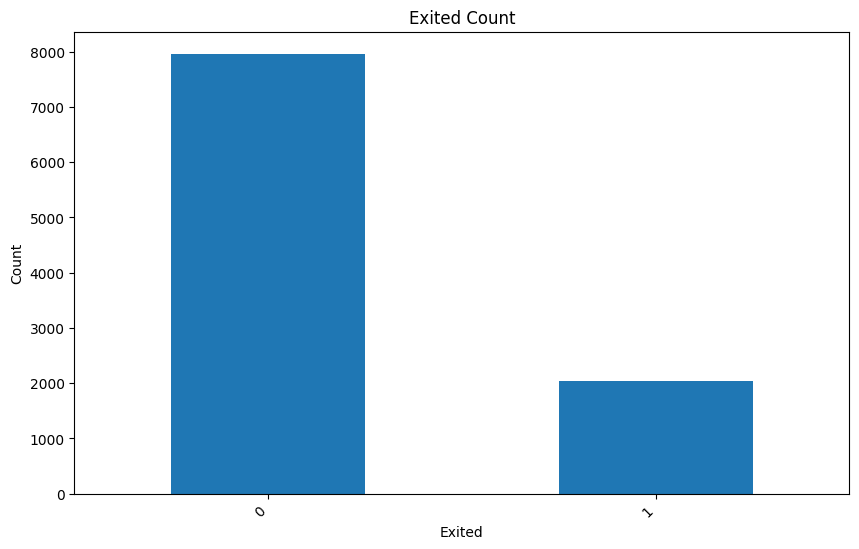

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
Exited_counts = dataset["Exited"].value_counts()
Exited_counts.plot(kind="bar")
plt.xlabel("Exited")
plt.ylabel("Count")
plt.title("Exited Count")
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-42-18e0c7595703>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset.groupby(['Gender']).sum().plot(kind='pie', y='Exited',autopct='%1.0f%%')


<Axes: ylabel='Exited'>

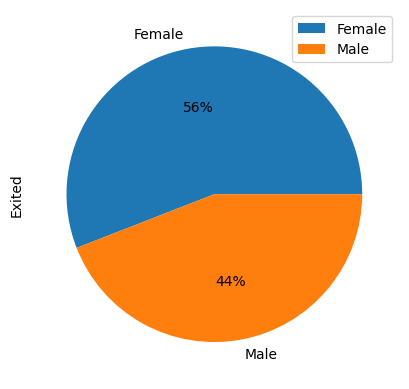

In [42]:
# Plotting the pie chart for gender to Exited
dataset.groupby(['Gender']).sum().plot(kind='pie', y='Exited',autopct='%1.0f%%')

In [43]:
print(dataset['HasCrCard'].value_counts())

1    7055
0    2945
Name: HasCrCard, dtype: int64


In [44]:
print(dataset['NumOfProducts'].value_counts())

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64


<ipython-input-45-1d42c0749818>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset.groupby(['NumOfProducts']).sum().plot(kind='pie', y='Exited',autopct='%1.0f%%')


<Axes: ylabel='Exited'>

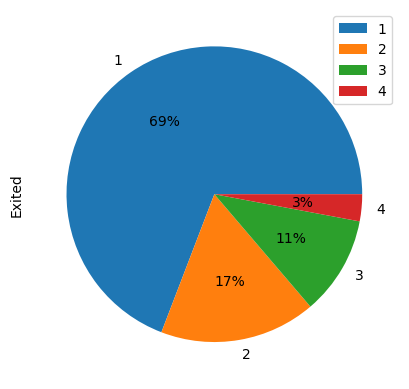

In [45]:
# Plotting the pie chart for NumOfProducts to Exited
dataset.groupby(['NumOfProducts']).sum().plot(kind='pie', y='Exited',autopct='%1.0f%%')

<ipython-input-46-75f5acea6157>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset.groupby(['HasCrCard']).sum().plot(kind='pie', y='Exited',autopct='%1.0f%%')


<Axes: ylabel='Exited'>

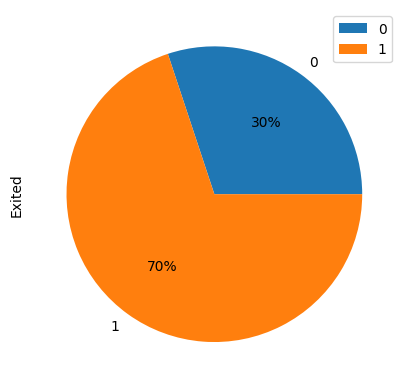

In [46]:
# Plotting the pie chart for HasCrCard to Exited
dataset.groupby(['HasCrCard']).sum().plot(kind='pie', y='Exited',autopct='%1.0f%%')

<ipython-input-47-36e6857d891c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset.groupby(['Geography']).sum().plot(kind='pie', y='Exited',autopct='%1.0f%%')


<Axes: ylabel='Exited'>

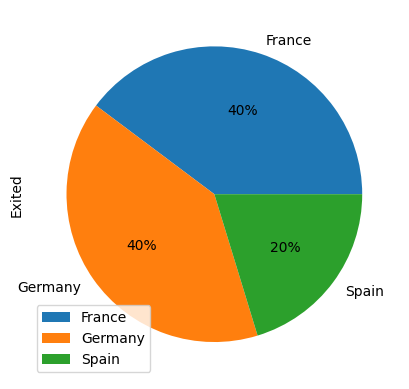

In [47]:
# Plotting the pie chart for Geography to Exited
dataset.groupby(['Geography']).sum().plot(kind='pie', y='Exited',autopct='%1.0f%%')

<ipython-input-48-27cf010ed0bc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=dataset.corr()


<Axes: >

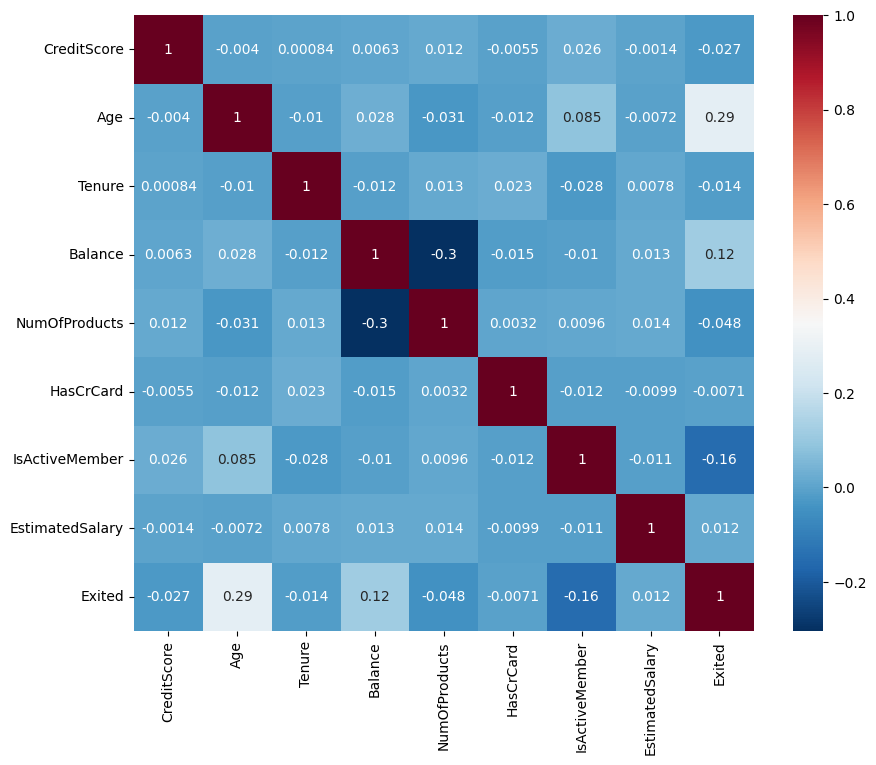

In [48]:
plt.figure(figsize=(10,8))
corr=dataset.corr()
sns.heatmap(corr,cmap=plt.cm.RdBu_r,annot=True,annot_kws={'size':10})

Data Preprocessing

In [66]:
dt=pd.get_dummies(dataset,columns=["Geography","Gender"],drop_first=True)

In [67]:
dt

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [68]:
X=dt.drop(columns=['Exited'])
y=dt['Exited']

In [69]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [70]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

Build Model

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [72]:
X_train.shape

(8000, 11)

In [73]:
y_train.shape

(8000,)

In [74]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [75]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [76]:
X_test_scaled

array([[-1.03768121,  0.77498705, -1.0482813 , ..., -0.58312392,
        -0.57273139,  0.91509065],
       [ 0.30708683, -0.46686456, -0.70174202, ..., -0.58312392,
        -0.57273139,  0.91509065],
       [-1.23422423,  0.29735181, -1.0482813 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       ...,
       [-0.86182692, -0.46686456,  1.72403288, ..., -0.58312392,
         1.74601919,  0.91509065],
       [-0.30323097, -0.84897275, -1.0482813 , ...,  1.71490137,
        -0.57273139, -1.09278791],
       [ 0.04847759,  1.25262228,  1.3774936 , ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [77]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [78]:
model=Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [79]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [80]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [81]:
history=model.fit(X_train_scaled,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
200/200 [==============================] - 2s 5ms/step - loss: 0.6346 - accuracy: 0.6516 - val_loss: 0.4983 - val_accuracy: 0.8006
Epoch 2/25
200/200 [==============================] - 1s 4ms/step - loss: 0.4666 - accuracy: 0.8066 - val_loss: 0.4454 - val_accuracy: 0.8056
Epoch 3/25
200/200 [==============================] - 1s 4ms/step - loss: 0.4361 - accuracy: 0.8155 - val_loss: 0.4326 - val_accuracy: 0.8131
Epoch 4/25
200/200 [==============================] - 1s 4ms/step - loss: 0.4250 - accuracy: 0.8223 - val_loss: 0.4250 - val_accuracy: 0.8169
Epoch 5/25
200/200 [==============================] - 1s 5ms/step - loss: 0.4174 - accuracy: 0.8255 - val_loss: 0.4163 - val_accuracy: 0.8200
Epoch 6/25
200/200 [==============================] - 0s 2ms/step - loss: 0.4097 - accuracy: 0.8303 - val_loss: 0.4085 - val_accuracy: 0.8225
Epoch 7/25
200/200 [==============================] - 1s 3ms/step - loss: 0.4009 - accuracy: 0.8338 - val_loss: 0.3992 - val_accuracy: 0.8288
Epoch 

In [88]:
history.history

{'loss': [0.6345727443695068,
  0.46655404567718506,
  0.43605509400367737,
  0.4250287115573883,
  0.4173998534679413,
  0.40966635942459106,
  0.4008772671222687,
  0.38928142189979553,
  0.3772738575935364,
  0.36714664101600647,
  0.3584507405757904,
  0.3530292212963104,
  0.3485802114009857,
  0.34580573439598083,
  0.34309399127960205,
  0.34170666337013245,
  0.34049007296562195,
  0.3388519287109375,
  0.3379797339439392,
  0.3366999328136444,
  0.33606624603271484,
  0.3349858820438385,
  0.33450847864151,
  0.3335553705692291,
  0.3326468765735626],
 'accuracy': [0.651562511920929,
  0.8065624833106995,
  0.8154687285423279,
  0.8223437666893005,
  0.8254687786102295,
  0.8303124904632568,
  0.8337500095367432,
  0.8407812714576721,
  0.8431249856948853,
  0.8503124713897705,
  0.852343738079071,
  0.8551562428474426,
  0.8553125262260437,
  0.8578125238418579,
  0.8582812547683716,
  0.859375,
  0.8587499856948853,
  0.8595312237739563,
  0.8603125214576721,
  0.86203122138